In [31]:
import pandas as pd
import numpy as np

source = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C'
df = pd.read_html(source, match='Коефіцієнт народжуваності в регіонах України', thousands=".", decimal=",")[0]
print(df.head)

<bound method NDFrame.head of                Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1     —
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  1

In [32]:
df.shape

(28, 9)

In [33]:
df.replace('—', np.nan, inplace=True)


In [34]:
df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object

In [35]:
#Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"
nan_columns = df.columns[df.isnull().any()].tolist()
df[nan_columns] = df[nan_columns].astype(float)

In [36]:
#Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)
df = df.fillna(df.mean(numeric_only=True), axis=0)
df.head(5)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,11.142308,8.020833
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.900000,7.600000
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.100000,10.100000
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.100000,7.100000
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.200000,8.020833


In [37]:
average_birth_rate_2019 = df['2019'].mean()
regions_above_average = df[df['2019'] > average_birth_rate_2019]['Регіон']
regions_above_average


2             Волинська
6          Закарпатська
8     Івано-Франківська
12            Львівська
14              Одеська
16           Рівненська
20           Херсонська
23          Чернівецька
25                 Київ
27              Україна
Name: Регіон, dtype: object

In [38]:
max_birth_rate_2014 = df[df['2014'] == df['2014'].max()]['Регіон'].values[0]
max_birth_rate_2014


'Рівненська'

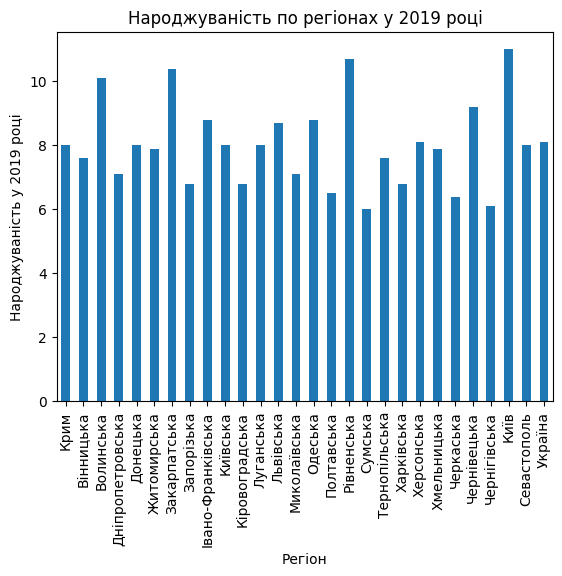

In [40]:
import matplotlib.pyplot as plt

df.plot(kind='bar', x='Регіон', y='2019', legend=False)
plt.ylabel('Народжуваність у 2019 році')
plt.title('Народжуваність по регіонах у 2019 році')
plt.show()


# Візуалізація

In [46]:
%matplotlib inline


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


Гістограма народжуваності за роками

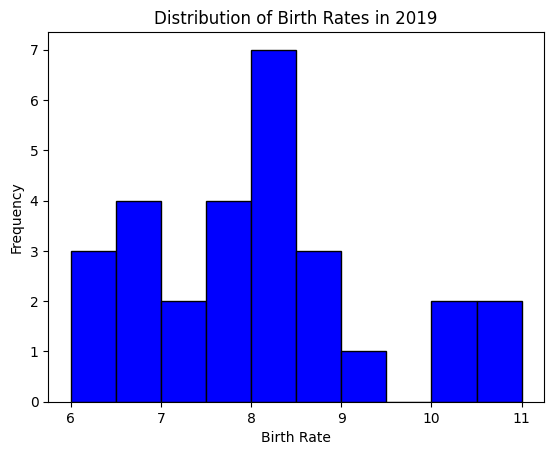

In [51]:
df.hist(column='2019', bins=10, grid=False, color='blue', edgecolor='black')
plt.title('Distribution of Birth Rates in 2019')
plt.xlabel('Birth Rate')
plt.ylabel('Frequency')
plt.show()

Кругова діаграма народжуваності по регіонах у 2019 році

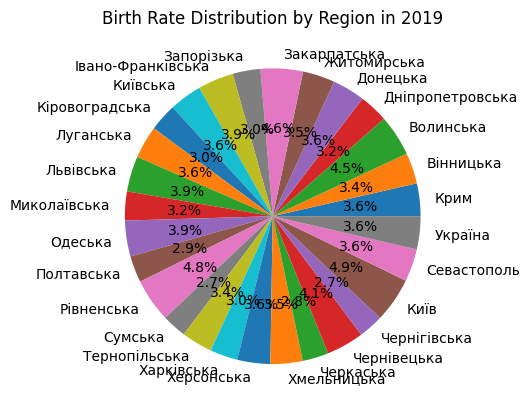

In [50]:
df_2019 = df[df['Регіон'] != 'Ukraine']  # виключити загальні дані по країні
plt.pie(df_2019['2019'], labels=df_2019['Регіон'], autopct='%1.1f%%')
plt.title('Birth Rate Distribution by Region in 2019')
plt.show()


Boxplot для виявлення варіацій у народжуваності за роками



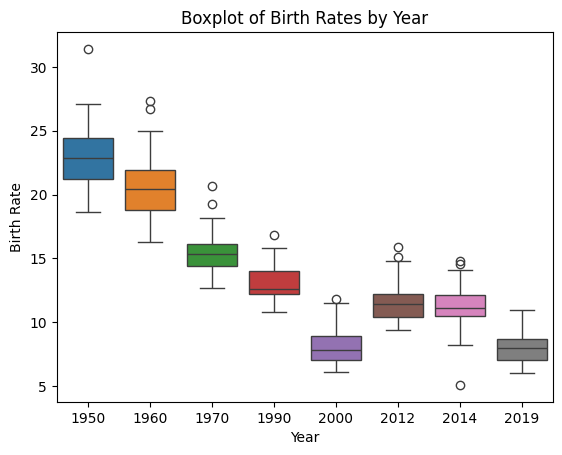

In [49]:
sns.boxplot(data=df.iloc[:, 1:])
plt.title('Boxplot of Birth Rates by Year')
plt.xlabel('Year')
plt.ylabel('Birth Rate')
plt.show()
